# Algorithme de Clustering K-Means

## Introduction
K-Means est un algorithme de clustering largement utilisé en fdata mining pour partitionner un ensemble de données en $𝑘$ clusters. Chaque cluster est défini par son $centroïde$, et l'algorithme attribue itérativement des points aux clusters et met à jour les centroïdes jusqu'à convergence.

## Étapes de l'algorithme

### Entrées :
1. $ X $= $\{x_1, x_2, \dots, x_n\} $: Un ensemble de points de données..
2. $ k $: Nombre de clusters.
3. $ \epsilon $: Seuil de convergence.

### Sorties :
1. $ C = \{C_1, C_2, \dots, C_k\} $: L'ensemble des clusters.
2. $ \mu_1, \mu_2, \dots, \mu_k $: TLes centroïdes des clusters

### Pseudo-code:
1. **Initialisation**: Initialiser aléatoirement $ k $ centroïdes $ \mu_1, \mu_2, \dots, \mu_k $.
2. **Répéter**:
   - **Étape d'assignation**:  
     Pour chaque point $ x \in X $, assigner  $ x $ au cluster $ C_j $ tel que:  
     $
     j = \arg\min_{1 \leq j \leq k} \|x - \mu_j\|^2
     $
   - **Étape de mise à jour**:  
     Pour chaque cluster $ C_j $, mettre à jour le centroïde :  
     $
     \mu_j \leftarrow \frac{1}{|C_j|} \sum_{x \in C_j} x
     $
3. **Jusqu'à**: Convergence des centroïdes (c.-à-d., lorsque le changement des centroïdes est $ \leq \epsilon $).


### Formulation mathématique
L'objectif de K-Means est de minimiser **la somme des carrés intra-cluster (WCSS)** :
$
J = \sum_{j=1}^k \sum_{x \in C_j} \|x - \mu_j\|^2
$
Où :
- $ \|x - \mu_j\| $ est la distance euclidienne entre le point $ x $ et le centroïde $ \mu_j $.
---

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [85]:
# Fonction pour la distance euclidienne
def euclidean_distance(point1, point2):
    """Calculer la distance euclidienne entre deux points."""
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

In [86]:
def manhattan_distance(point1, point2):
    """Calculer la distance de Manhattan entre deux points."""
    return abs(point2[0] - point1[0]) + abs(point2[1] - point1[1])

In [87]:
def minkowski_distance(point1, point2, p=2):
    """Calculer la distance de Minkowski entre deux points."""
    return (abs(point2[0] - point1[0])**p + abs(point2[1] - point1[1])**p)**(1/p)

In [88]:
# Charger les données
file_path = 'data/exo1.csv'  # Assurez-vous que le fichier exo1.csv est dans le bon répertoire
data = pd.read_csv(file_path)

In [89]:
# Centroides initiaux (choisis manuellement ou aléatoirement)
initial_centroids = {
    'C1': (2, 10),
    'C2': (5, 8),
    'C3': (1, 2)
}

In [90]:
def assign_clusters(data, centroids):
    """Assigner chaque point au cluster le plus proche."""
    clusters = []
    for _, row in data.iterrows():
        distances = {key: euclidean_distance((row['X'], row['Y']), value) for key, value in centroids.items()}
        cluster = min(distances, key=distances.get)
        clusters.append(cluster)
    data['Cluster'] = clusters
    return data
    

In [91]:
def update_centroids(data):
    """Mettre à jour les centroïdes en calculant la moyenne des points de chaque cluster."""
    new_centroids = {}
    for cluster in data['Cluster'].unique():
        cluster_points = data[data['Cluster'] == cluster]
        new_x = cluster_points['X'].mean()
        new_y = cluster_points['Y'].mean()
        new_centroids[cluster] = (new_x, new_y)
    return new_centroids

In [92]:
def kmeans(data, initial_centroids, max_iterations=10, tolerance=1e-4):
    """
    Implémentation de l'algorithme K-Means.

    Paramètres :
        - data : pd.DataFrame contenant les colonnes 'X1' et 'X2' représentant les coordonnées des points.
        - initial_centroids : dict contenant les centroïdes initiaux (par exemple {'C1': (x1, x2), 'C2': (x2, y2)}).
        - max_iterations : int, le nombre maximum d'itérations avant arrêt.
        - tolerance : float, seuil de tolérance pour vérifier la convergence.

    Retourne :
        - data : pd.DataFrame avec les colonnes 'Point', 'X', 'Y', et 'Cluster'.
        - centroids : dict contenant les centroïdes finaux.
    """
    centroids = initial_centroids
    for i in range(max_iterations):
        print(f"\nItération {i + 1}")
        data = assign_clusters(data, centroids)
        print(data[['Point', 'Cluster']])
        
        new_centroids = update_centroids(data)
        
        # Vérifier la convergence
        convergence = all(
            euclidean_distance(centroids[key], new_centroids[key]) <= tolerance
            for key in centroids.keys()
        )
        
        if convergence:
            print("Convergence atteinte. Les centroïdes ne changent plus.")
            break
        
        centroids = new_centroids
        print(f"Nouveaux centroïdes : {centroids}")
    
    return data, centroids


Itération 1
  Point Cluster
0    A1      C1
1    A2      C3
2    A3      C2
3    B1      C2
4    B2      C2
5    B3      C2
6    C1      C3
7    C2      C2
Nouveaux centroïdes : {'C1': (2.0, 10.0), 'C3': (1.5, 3.5), 'C2': (6.0, 6.0)}

Itération 2
  Point Cluster
0    A1      C1
1    A2      C3
2    A3      C2
3    B1      C2
4    B2      C2
5    B3      C2
6    C1      C3
7    C2      C1
Nouveaux centroïdes : {'C1': (3.0, 9.5), 'C3': (1.5, 3.5), 'C2': (6.5, 5.25)}

Itération 3
  Point Cluster
0    A1      C1
1    A2      C3
2    A3      C2
3    B1      C1
4    B2      C2
5    B3      C2
6    C1      C3
7    C2      C1
Nouveaux centroïdes : {'C1': (3.6666666666666665, 9.0), 'C3': (1.5, 3.5), 'C2': (7.0, 4.333333333333333)}

Itération 4
  Point Cluster
0    A1      C1
1    A2      C3
2    A3      C2
3    B1      C1
4    B2      C2
5    B3      C2
6    C1      C3
7    C2      C1
Convergence atteinte. Les centroïdes ne changent plus.


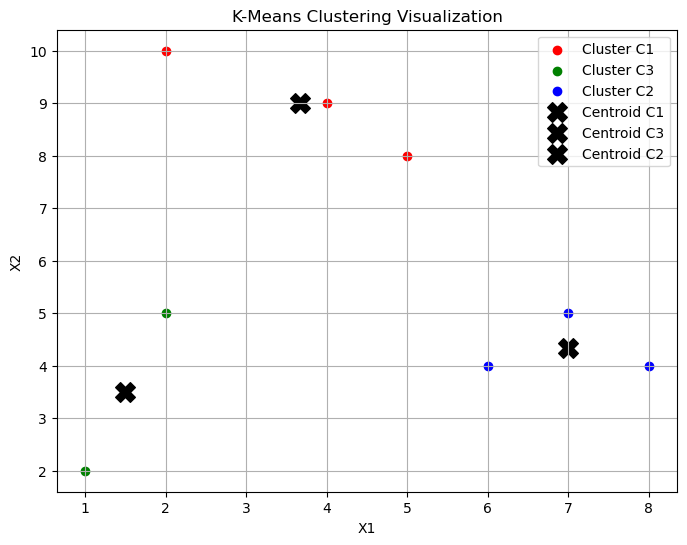

In [93]:
# Exécuter K-Means avec la distance choisie
final_data, final_centroids = kmeans(data, initial_centroids)


# Visualisation des clusters
plt.figure(figsize=(8, 6))

# Associer des couleurs aux clusters
colors = {'C1': 'red', 'C2': 'blue', 'C3': 'green'}

for cluster in final_data['Cluster'].unique():
    cluster_data = final_data[final_data['Cluster'] == cluster]
    plt.scatter(cluster_data['X'], cluster_data['Y'], color=colors[cluster], label=f'Cluster {cluster}')

# Ploter les centroïdes finaux
for centroid, coord in final_centroids.items():
    plt.scatter(coord[0], coord[1], color='black', marker='X', s=200, label=f'Centroid {centroid}')

# Ajouter des labels et une légende
plt.title('K-Means Clustering Visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()